## Cats vs Dogs

In [1]:
from os import listdir
from os.path import isfile, join

mypath = "./datasets/images/"

file_names = [f for f in listdir(mypath) if isfile(join(mypath,f))]

print(str(len(file_names)) + ' images loaded')

3002 images loaded


## Splitting our loaded images into a training and test/validation dataset
- we also need to store the labels(i.e. y_train and y_test
- We re-size our images here to maintain a constant dimension of 150 x 150
- We're going to use 1000 images of dogs and 1000 images of cats as our training data
- For our test/validation dataset we're going to use 500 of each class
- Dogs will be labels 1 and cats 0
- We store our new images in the following directories

    - /datasets/catsvsdogs/train/dogs
    - /datasets/catsvsdogs/train/cats
    - /datasets/catsvsdogs/validation/dogs
    - /datasets/catsvsdogs/validation/cats


In [2]:
import numpy as np
import cv2
import sys
import os
import shutil

#Extract 1000 images for our training data and 500 for  our test set

dog_count = 0
cat_count = 0
training_size = 1000
test_size = 500
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150

dog_dir_train = "./datasets/catsvsdogs/train/dogs/"
cat_dir_train = "./datasets/catsvsdogs/train/cats/"
dog_dir_test = "./datasets/catsvsdogs/test/dogs/"
cat_dir_test = "./datasets/catsvsdogs/test/cats/"

def make_dir(directory):
    if os.path.exists(directory):
        shutil.rmtree(directory) #shutil.rmtree() is used to delete an entire directory tree, path must point to a directory (but not a symbolic link to a directory).
    os.makedirs(directory)
    
make_dir(dog_dir_train)
make_dir(cat_dir_train)
make_dir(dog_dir_test)
make_dir(cat_dir_test)

def getZeros(number):
    if(number > 10 and number < 100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""

for i, file in enumerate(file_names):
    
    if file_names[i][0] == "d":
        dog_count +=1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image,(size,size),interpolation = cv2.INTER_AREA)
        
        if dog_count <= training_size:
            training_images.append(image)
            training_labels.append(1)
            zeros = getZeros(dog_count)
            cv2.imwrite(dog_dir_train + "dog" + str(zeros) + str(dog_count)+".jpg",image)
            
        if dog_count>training_size and dog_count<=training_size + test_size:
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(dog_count-1000)
            cv2.imwrite(dog_dir_test + "dog" + str(zeros) + str(dog_count-1000) + ".jpg", image)
    
    if file_names[i][0] == "c":
        cat_count +=1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image,(size,size),interpolation=cv2.INTER_AREA)
        
        
        if cat_count<=training_size:
            training_images.append(image)
            training_labels.append(0)
            zeros = getZeros(cat_count)
            cv2.imwrite(cat_dir_train + "cat" + str(zeros) + str(cat_count)+ ".jpg",image)
        
        if cat_count > training_size and cat_count <= training_size + test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros = getZeros(cat_count-1000)
            cv2.imwrite(cat_dir_test + "cat" + str(zeros) + str(cat_count-1000) + ".jpg",image)
            
            
    if dog_count == training_size+test_size and cat_count == training_size + test_size:
        break
        

            
print("Training and Test Data Extraction Complete. Check dir")

Training and Test Data Extraction Complete. Check dir


## Let's save our datasets to NPZ files

- NPZ is a file format by numpy that provides storage of array data using gzip compression. This imageio plugin supports data of any shape, and also supports multiple images per file.

In [3]:
# Using numpy's savez function to store our loaded data as NPZ files

np.savez('cats_vs_dogs_training_data.npz',np.array(training_images))
np.savez('cats_vs_dogs_training_labels.npz',np.array(training_labels))
np.savez('cats_vs_dogs_test_data.npz',np.array(test_images))
np.savez('cats_vs_dogs_test_labels.npz',np.array(test_labels))

In [4]:
#Loader Function
import numpy as np

def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']
    
    return (train, train_labels), (test, test_labels)

### Let's view some of our loaded image

In [5]:
for i in range(1,11):
    random = np.random.randint(0, len(training_images))
    cv2.imshow("image_"+str(i), training_images[random])
    if training_labels[random] == 0:
        print(str(i) + " - Cat")
    else:
        print(str(i)+ " - Dog")
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

1 - Dog
2 - Dog
3 - Dog
4 - Dog
5 - Cat
6 - Cat
7 - Dog
8 - Cat
9 - Cat
10 - Dog


0 - Cat
1 - Cat
2 - Dog
3 - Dog
4 - Cat
5 - Dog
6 - Dog
7 - Cat
8 - Dog


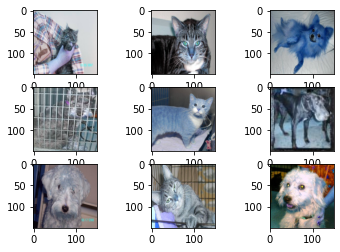

In [6]:
#Alternatively 
from matplotlib import pyplot as plt
for i in range(9):
    plt.subplot(330+1+i)
    random = np.random.randint(0,len(training_images))
    plt.imshow(training_images[random])
    if training_labels[random] == 0:
        print(str(i) + " - Cat")
    else:
        print(str(i)+ " - Dog")

## Let's get our data ready in format expected by keras

In [8]:
(X_train,y_train),(X_test,y_test) = load_data_training_and_test("cats_vs_dogs")


#Reshaping our label data from (2000,) to (2000,1) and test data from (1000,) to (1000,1)

y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

#changing our image to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalise our data by changing the range from (0 to 255) to (0 to 1)
X_train /= 255
X_test /=255

print("SIze of X_train is :",X_train.shape)
print("SIze of y_train is :",y_train.shape)
print("SIze of X_test is :",X_test.shape)
print("SIze of y_test is :",y_test.shape)

SIze of X_train is : (2000, 150, 150, 3)
SIze of y_train is : (2000, 1)
SIze of X_test is : (1000, 150, 150, 3)
SIze of y_test is : (1000, 1)


## creating our model using a simple CNN that similar to what we used for CIFAR10
- Except now we use a Sigmoid instead of Softmax
    - **Sigmoids are used when we're doing binary (i.e. two class) classification
        - Note the binary_crossentropy loss

In [9]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import os

batch_size = 16
epochs = 25

img_rows = X_train[0].shape[0]
img_cols = X_train[1].shape[0]
input_shape = (img_rows,img_cols,3)

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64)) #Dense is use for output layer
model.add(Activation('relu'))


model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer ='rmsprop',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

## Training our model

In [10]:
history = model.fit(X_train,y_train,
                   batch_size=batch_size,
                   epochs = epochs, 
                   validation_data=(X_test,y_test),
                   shuffle= True)
model.save("cats_vs_dogs_V1.h5")

#Evaluate the performance of our trained model
scores = model.evaluate(X_test,y_test,verbose=1)
print('Test loss:',scores[0])
print('Test accuracy:',scores[1])

Epoch 1/25
125/125 [==============================] - 15s 48ms/step - loss: 0.7282 - accuracy: 0.5167 - val_loss: 0.6879 - val_accuracy: 0.5150
Epoch 2/25
125/125 [==============================] - 4s 33ms/step - loss: 0.6693 - accuracy: 0.6041 - val_loss: 0.6360 - val_accuracy: 0.6250
Epoch 3/25
125/125 [==============================] - 4s 34ms/step - loss: 0.6127 - accuracy: 0.6886 - val_loss: 0.5680 - val_accuracy: 0.7030
Epoch 4/25
125/125 [==============================] - 4s 34ms/step - loss: 0.5526 - accuracy: 0.7110 - val_loss: 0.5474 - val_accuracy: 0.7360
Epoch 5/25
125/125 [==============================] - 4s 34ms/step - loss: 0.5023 - accuracy: 0.7531 - val_loss: 0.5389 - val_accuracy: 0.7370
Epoch 6/25
125/125 [==============================] - 4s 36ms/step - loss: 0.4473 - accuracy: 0.7945 - val_loss: 0.5361 - val_accuracy: 0.7490
Epoch 7/25
125/125 [==============================] - 4s 35ms/step - loss: 0.4174 - accuracy: 0.8035 - val_loss: 0.6316 - val_accuracy: 0.689

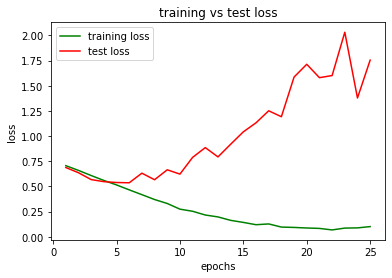

In [11]:
#Plotting our test and train loss
loss_train = history.history['loss']
loss_test = history.history['val_loss']
epochs = range(1,len(loss_train)+1)

plt.plot(epochs,loss_train,'g',label='training loss')
plt.plot(epochs,loss_test,'r',label='test loss')

plt.title('training vs test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

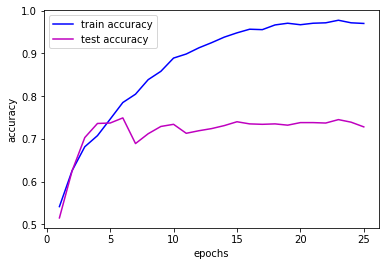

In [12]:

#plotting test and train accuracy
acc_train = history.history['accuracy']
acc_test = history.history['val_accuracy']
epochs = range(1,len(acc_train)+1)

plt.plot(epochs,acc_train,'b',label='train accuracy')
plt.plot(epochs,acc_test,'m',label='test accuracy')


plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Testing our classifier

In [13]:
import cv2
import numpy as np
from keras.models import load_model

classifier=load_model("cats_vs_dogs_V1.h5")

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    if pred == "[0]":
        pred = "cat"
    if pred == "[1]":
        pred = "dog"
    
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    #expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    
    cv2.putText(expanded_image, str(pred), (252, 200) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (23,0,255), 2)
    
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(X_test))
    input_im = X_test[rand]

    imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Test Image", imageL)

    input_im = input_im.reshape(1,150,150,3) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

C:\Users\Sumit\anaconda3\envs\cv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import cv2
import numpy as np
from keras.models import load_model

classifier=load_model("cats_vs_dogs_V1.h5")

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    BLACK = [0,0,0]
    input_dict = {"0":"cat", "1":"dog"}
    pred = input_dict[pred]

    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    #expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    
    cv2.putText(expanded_image, str(pred), (252, 200) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (23,0,255), 2)
    
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(X_test))
    input_im = X_test[rand]

    imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Test Image", imageL)

    input_im = input_im.reshape(1,150,150,3) 
    
    ## Get Prediction
    res = str(np.argmax(classifier.predict(input_im, 1, verbose = 0)))

    draw_test("Prediction", "1", imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [14]:
!git add Dogvscat.ipynb cats_vs_dogs_V1.h5
! git commit -m "21:40/30-04-2021"
! git push origin main

The file will have its original line endings in your working directory


[main a375456] 21:40/30-04-2021
 2 files changed, 827 insertions(+)
 create mode 100644 Data_Augmentation(DogxCat)/Dogvscat.ipynb
 create mode 100644 Data_Augmentation(DogxCat)/cats_vs_dogs_V1.h5


To https://github.com/sumit-mandal/OpenCVtut.git
 ! [rejected]        main -> main (non-fast-forward)
error: failed to push some refs to 'https://github.com/sumit-mandal/OpenCVtut.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Integrate the remote changes (e.g.
hint: 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
